### 미션: 구별, 동단위 건물주 용별 평균 시세
* 1. 구 단위 데이터 조회
    * 구 이름 입력
    * 파일에서 해당 구 이름을 기준으로 데이터 조회
    * '자치구명', '법정동명', '건물주용도', '건축년도', '건물면적', '층정보', '물건금액', '건물명' 리스트 데이터 추가

In [388]:
# 사용자로부터 구명, 동명을 입력받아 조회
# 출력값 : '자치구명', '법정동명', '건물주용도', '건축년도', '건물면적', '층정보', '물건금액', '건물명'
#                3         5           15(-4)       17(-2)       11        13         16(-3)     18(-1)
import csv
import matplotlib.pyplot as plt

g_name = input('조회 구 이름 입력:')
#d_name = input('조회 동 이름 입력:')

f = open('./data/서울특별시_부동산_실거래가_정보_2020년.csv')
data = csv.reader(f)
header = next(data)

data_lst = []
for row in data:
    if g_name == row[3]:
        #d_name in row[5]:
        data_lst.append([row[3],row[5],row[-4],row[-2],row[11],row[13],row[-3],row[-1]])
        
f.close()
data_lst

조회 구 이름 입력:성북구


[['성북구', '장위동', '아파트', '0', '59.920000', '5', '749000000', '래미안 장위포레카운티'],
 ['성북구', '길음동', '아파트', '0', '84.770000', '18', '1200000000', '롯데캐슬 클라시아 '],
 ['성북구', '장위동', '아파트', '0', '116.910000', '2', '1270000000', '래미안장위퍼스트하이'],
 ['성북구', '석관동', '아파트', '1998', '84.900000', '17', '647000000', '두산'],
 ['성북구', '석관동', '단독주택', '1973', '59.970000', '', '270000000', ''],
 ['성북구', '장위동', '아파트', '0', '59.990000', '17', '820000000', '래미안장위퍼스트하이'],
 ['성북구', '성북동', '단독주택', '1980', '19.830000', '', '400000000', ''],
 ['성북구', '돈암동', '아파트', '1994', '84.720000', '12', '494000000', '동소문현대'],
 ['성북구', '정릉동', '단독주택', '1970', '61.350000', '', '295000000', ''],
 ['성북구', '장위동', '단독주택', '1970', '62.550000', '', '714600000', ''],
 ['성북구', '장위동', '아파트', '0', '84.480000', '12', '1150000000', '꿈의숲 아이파크'],
 ['성북구', '길음동', '단독주택', '1994', '119.250000', '', '500000000', ''],
 ['성북구', '상월곡동', '아파트', '2003', '59.950000', '22', '628000000', '동아에코빌'],
 ['성북구', '길음동', '아파트', '0', '84.770000', '8', '1160000000', '롯데캐슬 클라시아 

* 2. 동 단위
    * 해당 구에 속한 동 리스트 조회
    * 해당 리스트를 이용해 동별 '아파트' 평균(합계/수량 or mean) 계산
    * 동별 평균 출력

In [389]:
d_name = []
for lst in data_lst:
    if lst[1] in d_name:
        continue
    else:
        d_name.append(lst[1])
print(d_name)

['장위동', '길음동', '석관동', '성북동', '돈암동', '정릉동', '상월곡동', '동선동5가', '동선동3가', '종암동', '삼선동1가', '하월곡동', '동소문동5가', '보문동6가', '삼선동3가', '안암동3가', '삼선동2가', '동선동1가', '삼선동4가', '안암동1가', '보문동3가', '삼선동5가', '동선동4가', '동소문동7가', '보문동1가', '동소문동4가', '보문동5가', '동소문동6가', '안암동4가', '성북동1가', '안암동5가', '보문동4가', '안암동2가', '보문동2가', '보문동7가', '동소문동1가', '동소문동2가', '동선동2가']


In [390]:
avg_lst = []
for dong in d_name:
    cnt = 0
    tot = 0
    for lst in data_lst:
        if lst[1] == dong and lst[2] == '아파트':
            tot += int(lst[-2])
            cnt += 1
    if cnt==0:
        avg_lst.append({"동이름":dong, "평균판매가":0, "거래건수":0})
    else:
        avg = tot/cnt
        avg_lst.append({"동이름":dong, "평균판매가":int(avg), "거래건수":cnt})
    
avg_lst

[{'동이름': '장위동', '평균판매가': 743787678, '거래건수': 168},
 {'동이름': '길음동', '평균판매가': 843763421, '거래건수': 871},
 {'동이름': '석관동', '평균판매가': 673315019, '거래건수': 253},
 {'동이름': '성북동', '평균판매가': 332900000, '거래건수': 10},
 {'동이름': '돈암동', '평균판매가': 675744147, '거래건수': 786},
 {'동이름': '정릉동', '평균판매가': 529745429, '거래건수': 1072},
 {'동이름': '상월곡동', '평균판매가': 555521739, '거래건수': 115},
 {'동이름': '동선동5가', '평균판매가': 0, '거래건수': 0},
 {'동이름': '동선동3가', '평균판매가': 440000000, '거래건수': 1},
 {'동이름': '종암동', '평균판매가': 739472074, '거래건수': 376},
 {'동이름': '삼선동1가', '평균판매가': 0, '거래건수': 0},
 {'동이름': '하월곡동', '평균판매가': 692055138, '거래건수': 506},
 {'동이름': '동소문동5가', '평균판매가': 594531250, '거래건수': 16},
 {'동이름': '보문동6가', '평균판매가': 824054054, '거래건수': 148},
 {'동이름': '삼선동3가', '평균판매가': 955962962, '거래건수': 27},
 {'동이름': '안암동3가', '평균판매가': 396111111, '거래건수': 27},
 {'동이름': '삼선동2가', '평균판매가': 744601063, '거래건수': 94},
 {'동이름': '동선동1가', '평균판매가': 638666666, '거래건수': 6},
 {'동이름': '삼선동4가', '평균판매가': 671347826, '거래건수': 23},
 {'동이름': '안암동1가', '평균판매가': 745318181, '거래건수': 33},
 {'동이

In [391]:
import pandas as pd
df = pd.DataFrame(avg_lst)
df

,동이름,평균판매가,거래건수
0,장위동,743787678,168
1,길음동,843763421,871
2,석관동,673315019,253
3,성북동,332900000,10
4,돈암동,675744147,786
5,정릉동,529745429,1072
6,상월곡동,555521739,115
7,동선동5가,0,0
8,동선동3가,440000000,1
9,종암동,739472074,376


In [392]:
df1= df[df['평균판매가'] != 0]
df1 = df1.sort_values(by=['거래건수'], ascending=False)

In [393]:
df1

,동이름,평균판매가,거래건수
5,정릉동,529745429,1072
1,길음동,843763421,871
4,돈암동,675744147,786
11,하월곡동,692055138,506
9,종암동,739472074,376
2,석관동,673315019,253
0,장위동,743787678,168
13,보문동6가,824054054,148
6,상월곡동,555521739,115
16,삼선동2가,744601063,94


* 3. 동별 평균 값을 이용해 막대 그래프
    * 막대 그래프
    * box plot 그래프

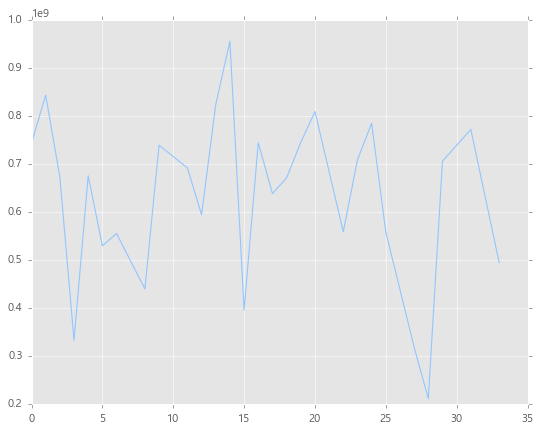

In [401]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

df1['평균판매가'].plot()
plt.show()

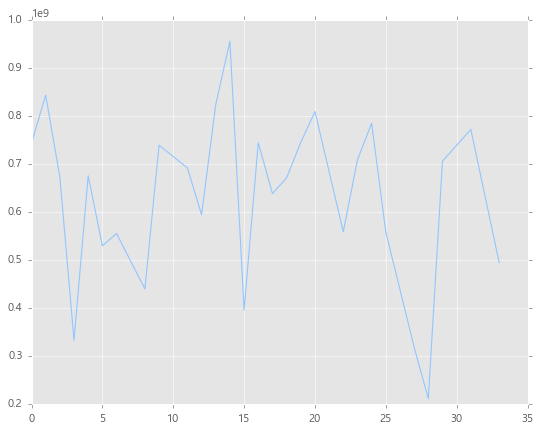

In [402]:
df1 = df1.sort_index()
df1['평균판매가'].plot()
plt.show()

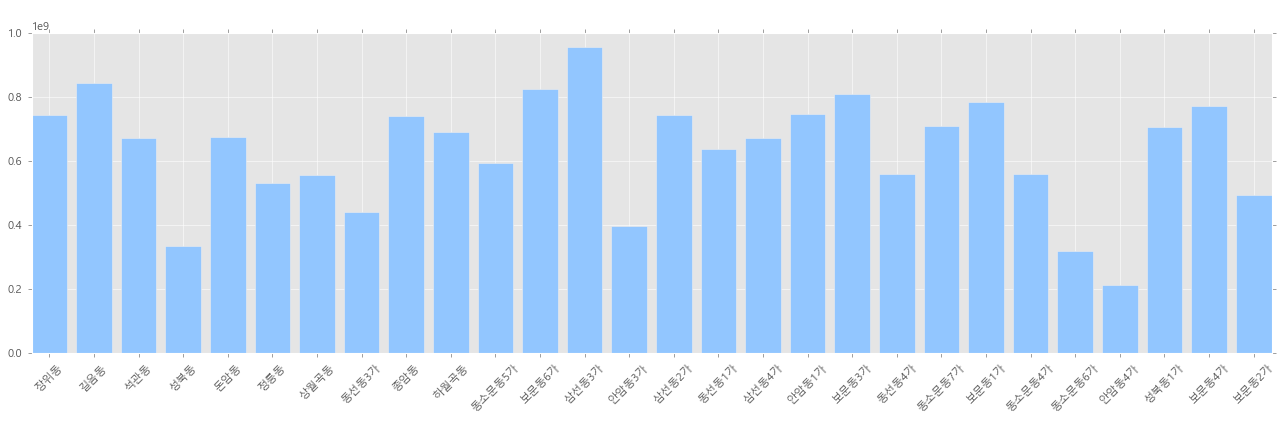

In [403]:
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

plt.style.use('seaborn-pastel')
plt.figure(figsize=(20, 5))
plt.xticks(size=10, rotation=45)
plt.bar(df1['동이름'], df1['평균판매가'])
plt.title(g_name+' 동별 아파트 평균 판매가 분석', size=24)
plt.show()

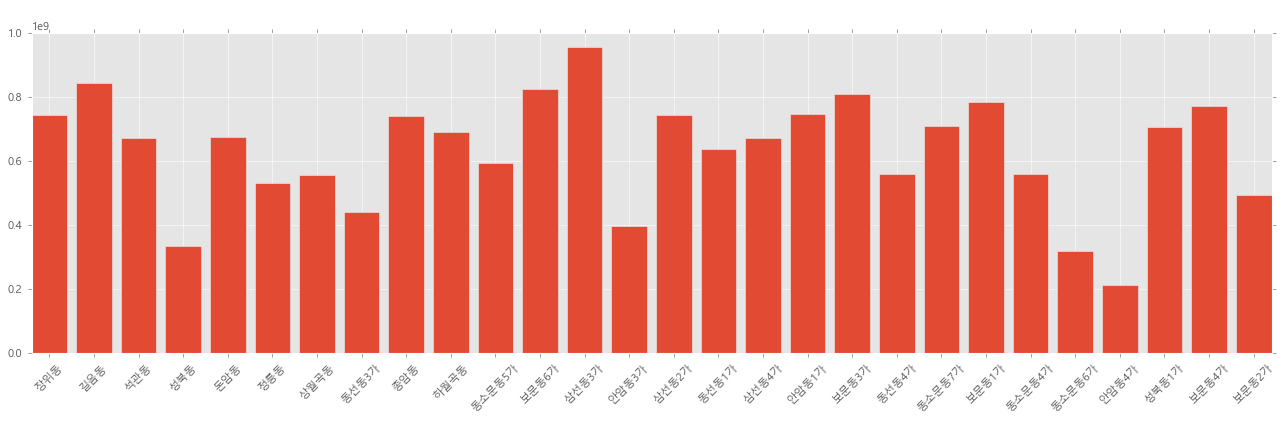

In [404]:
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

plt.style.use('ggplot')
plt.figure(figsize=(20, 5))
plt.xticks(size=10, rotation=45)
plt.bar(df1['동이름'], df1['평균판매가'])
plt.title(g_name+' 동별 아파트 평균 판매가 분석', size=24)
plt.show()

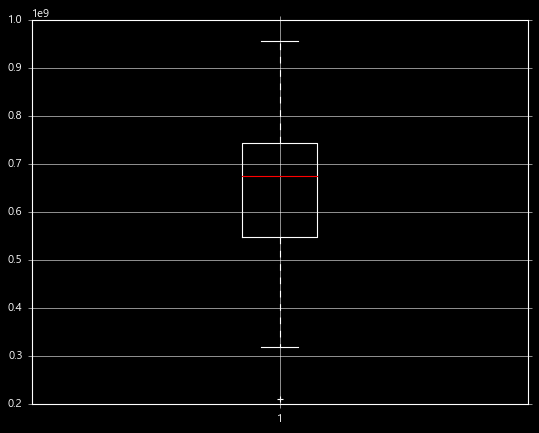

In [405]:
plt.style.use('dark_background')
plt.boxplot(df1['평균판매가'])
plt.show()